# Disease Prediction using machine learning(Symptom based)

# Overall Accuracy = (95.02 + 95.12 + 95.2)/3 = 95.14%

In [1]:
# Importing libraries for data visualization and preprocessing
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting
from sklearn.preprocessing import StandardScaler  # For standardizing features
import matplotlib.pyplot as plt  # For plotting
from tkinter import *  # For creating GUI (Graphical User Interface)
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import os  # For interacting with the operating system


In [2]:
#List of the symptoms is listed here in list l1.

l1=['back_pain','constipation','abdominal_pain','diarrhoea','mild_fever','yellow_urine',
    'yellowing_of_eyes','acute_liver_failure','fluid_overload','swelling_of_stomach',
    'swelled_lymph_nodes','malaise','blurred_and_distorted_vision','phlegm','throat_irritation',
    'redness_of_eyes','sinus_pressure','runny_nose','congestion','chest_pain','weakness_in_limbs',
    'fast_heart_rate','pain_during_bowel_movements','pain_in_anal_region','bloody_stool',
    'irritation_in_anus','neck_pain','dizziness','cramps','bruising','obesity','swollen_legs',
    'swollen_blood_vessels','puffy_face_and_eyes','enlarged_thyroid','brittle_nails',
    'swollen_extremeties','excessive_hunger','extra_marital_contacts','drying_and_tingling_lips',
    'slurred_speech','knee_pain','hip_joint_pain','muscle_weakness','stiff_neck','swelling_joints',
    'movement_stiffness','spinning_movements','loss_of_balance','unsteadiness',
    'weakness_of_one_body_side','loss_of_smell','bladder_discomfort','foul_smell_of urine',
    'continuous_feel_of_urine','passage_of_gases','internal_itching','toxic_look_(typhos)',
    'depression','irritability','muscle_pain','altered_sensorium','red_spots_over_body','belly_pain',
    'abnormal_menstruation','dischromic _patches','watering_from_eyes','increased_appetite','polyuria','family_history','mucoid_sputum',
    'rusty_sputum','lack_of_concentration','visual_disturbances','receiving_blood_transfusion',
    'receiving_unsterile_injections','coma','stomach_bleeding','distention_of_abdomen',
    'history_of_alcohol_consumption','fluid_overload','blood_in_sputum','prominent_veins_on_calf',
    'palpitations','painful_walking','pus_filled_pimples','blackheads','scurring','skin_peeling',
    'silver_like_dusting','small_dents_in_nails','inflammatory_nails','blister','red_sore_around_nose',
    'yellow_crust_ooze']

In [3]:
#List of Diseases is listed in list disease.

disease=['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo']



In [4]:
# Initialize a list l2 with zeros, having the same length as the list l1
l2 = [0] * len(l1)
print(l2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [5]:
# Reading the training.csv file into a Pandas DataFrame
df = pd.read_csv("training.csv")

# Creating another DataFrame DF with 'prognosis' as the index
DF = pd.read_csv('training.csv', index_col='prognosis')

# Replacing the values in the 'prognosis' column with numerical labels
df.replace({'prognosis': {
    'Fungal infection': 0, 'Allergy': 1, 'GERD': 2, 'Chronic cholestasis': 3, 'Drug Reaction': 4,
    'Peptic ulcer diseae': 5, 'AIDS': 6, 'Diabetes ': 7, 'Gastroenteritis': 8, 'Bronchial Asthma': 9, 'Hypertension ': 10,
    'Migraine': 11, 'Cervical spondylosis': 12,
    'Paralysis (brain hemorrhage)': 13, 'Jaundice': 14, 'Malaria': 15, 'Chicken pox': 16, 'Dengue': 17, 'Typhoid': 18, 'hepatitis A': 19,
    'Hepatitis B': 20, 'Hepatitis C': 21, 'Hepatitis D': 22, 'Hepatitis E': 23, 'Alcoholic hepatitis': 24, 'Tuberculosis': 25,
    'Common Cold': 26, 'Pneumonia': 27, 'Dimorphic hemmorhoids(piles)': 28, 'Heart attack': 29, 'Varicose veins': 30, 'Hypothyroidism': 31,
    'Hyperthyroidism': 32, 'Hypoglycemia': 33, 'Osteoarthristis': 34, 'Arthritis': 35,
    '(vertigo) Paroymsal  Positional Vertigo': 36, 'Acne': 37, 'Urinary tract infection': 38, 'Psoriasis': 39,
    'Impetigo': 40
}}, inplace=True)

# Displaying the first few rows of the DataFrame
df.head()


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          1                     1                    0          0   
2        1          0                     1                    0          0   
3        1          1                     0                    0          0   
4        1          1                     1                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       0           0             0        0                 0  ...   
2       0           0             0        0                 0  ...   
3       0           0             0        0                 0  ...   
4       0           0             0        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0          0  
1                  0          0  
2                  0          0  
3                  0          0  
4                  0          0  

[5 rows x 133 columns]

In [6]:
DF.head()

itching  skin_rash  nodal_skin_eruptions  \
prognosis                                                    
Fungal infection        1          1                     1   
Fungal infection        0          1                     1   
Fungal infection        1          0                     1   
Fungal infection        1          1                     0   
Fungal infection        1          1                     1   

                  continuous_sneezing  shivering  chills  joint_pain  \
prognosis                                                              
Fungal infection                    0          0       0           0   
Fungal infection                    0          0       0           0   
Fungal infection                    0          0       0           0   
Fungal infection                    0          0       0           0   
Fungal infection                    0          0       0           0   

                  stomach_pain  acidity  ulcers_on_tongue  ...  \
prognosis                                                  ...   
Fungal infection             0        0                 0  ...   
Fungal infection             0        0                 0  ...   
Fungal infection             0        0                 0  ...   
Fungal infection             0        0                 0  ...   
Fungal infection             0        0                 0  ...   

                  pus_filled_pimples  blackheads  scurring  skin_peeling  \
prognosis                                                                  
Fungal infection                   0           0         0             0   
Fungal infection                   0           0         0             0   
Fungal infection                   0           0         0             0   
Fungal infection                   0           0         0             0   
Fungal infection                   0           0         0             0   

                  silver_like_dusting  small_dents_in_nails  \
prognosis                                                     
Fungal infection                    0                     0   
Fungal infection                    0                     0   
Fungal infection                    0                     0   
Fungal infection                    0                     0   
Fungal infection                    0                     0   

                  inflammatory_nails  blister  red_sore_around_nose  \
prognosis                                                             
Fungal infection                   0        0                     0   
Fungal infection                   0        0                     0   
Fungal infection                   0        0                     0   
Fungal infection                   0        0                     0   
Fungal infection                   0        0                     0   

                  yellow_crust_ooze  
prognosis                            
Fungal infection                  0  
Fungal infection                  0  
Fungal infection                  0  
Fungal infection                  0  
Fungal infection                  0  

[5 rows x 132 columns]

In [7]:
# Distribution graphs (histograms/bar graphs) of column data
def plotPerColumnDistribution(df1, nGraphShown, nGraphPerRow):
    # Get the number of unique values in each column
    nunique = df1.nunique()
    
    # Filter columns based on the number of unique values (between 1 and 50)
    df1 = df1[[col for col in df1 if nunique[col] > 1 and nunique[col] < 50]]
    
    # Get the number of rows and columns in the DataFrame
    nRow, nCol = df1.shape
    
    # Get the column names
    columnNames = list(df1)
    
    # Calculate the number of rows for the subplot grid
    nGraphRow = (nCol + nGraphPerRow - 1) // nGraphPerRow
    
    # Create a new figure for the plots
    plt.figure(num=None, figsize=(6 * nGraphPerRow, 8 * nGraphRow), dpi=80, facecolor='w', edgecolor='k')
    
    # Iterate over each column and create subplots
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df1.iloc[:, i]
        
        # Check if the column data type is not numeric
        if not np.issubdtype(type(columnDf.iloc[0]), np.number):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            # Plot histogram for numeric columns
            columnDf.hist()
        
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    
    # Adjust layout for better visualization
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    
    # Display the plots
    plt.show()


In [8]:
# Scatter and density plots
def plotScatterMatrix(df1, plotSize, textSize):
    # Keep only numerical columns in the DataFrame
    df1 = df1.select_dtypes(include=[np.number])
    
    # Remove rows and columns with NaN values
    df1 = df1.dropna('columns')
    
    # Keep columns with more than 1 unique value
    df1 = df1[[col for col in df1 if df1[col].nunique() > 1]]
    
    # Get column names
    columnNames = list(df1)
    
    # Limit the number of columns for matrix inversion of kernel density plots
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    
    # Select the reduced set of columns
    df1 = df1[columnNames]
    
    # Create scatter matrix with kernel density plots on the diagonal
    ax = pd.plotting.scatter_matrix(df1, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    
    # Calculate correlation coefficients for each pair of columns
    corrs = df1.corr().values
    
    # Annotate the upper triangular part of the scatter matrix with correlation coefficients
    for i, j in zip(*plt.np.triu_indices_from(ax, k=1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    # Set the title for the scatter matrix
    plt.suptitle('Scatter and Density Plot')
    
    # Display the plots
    plt.show()


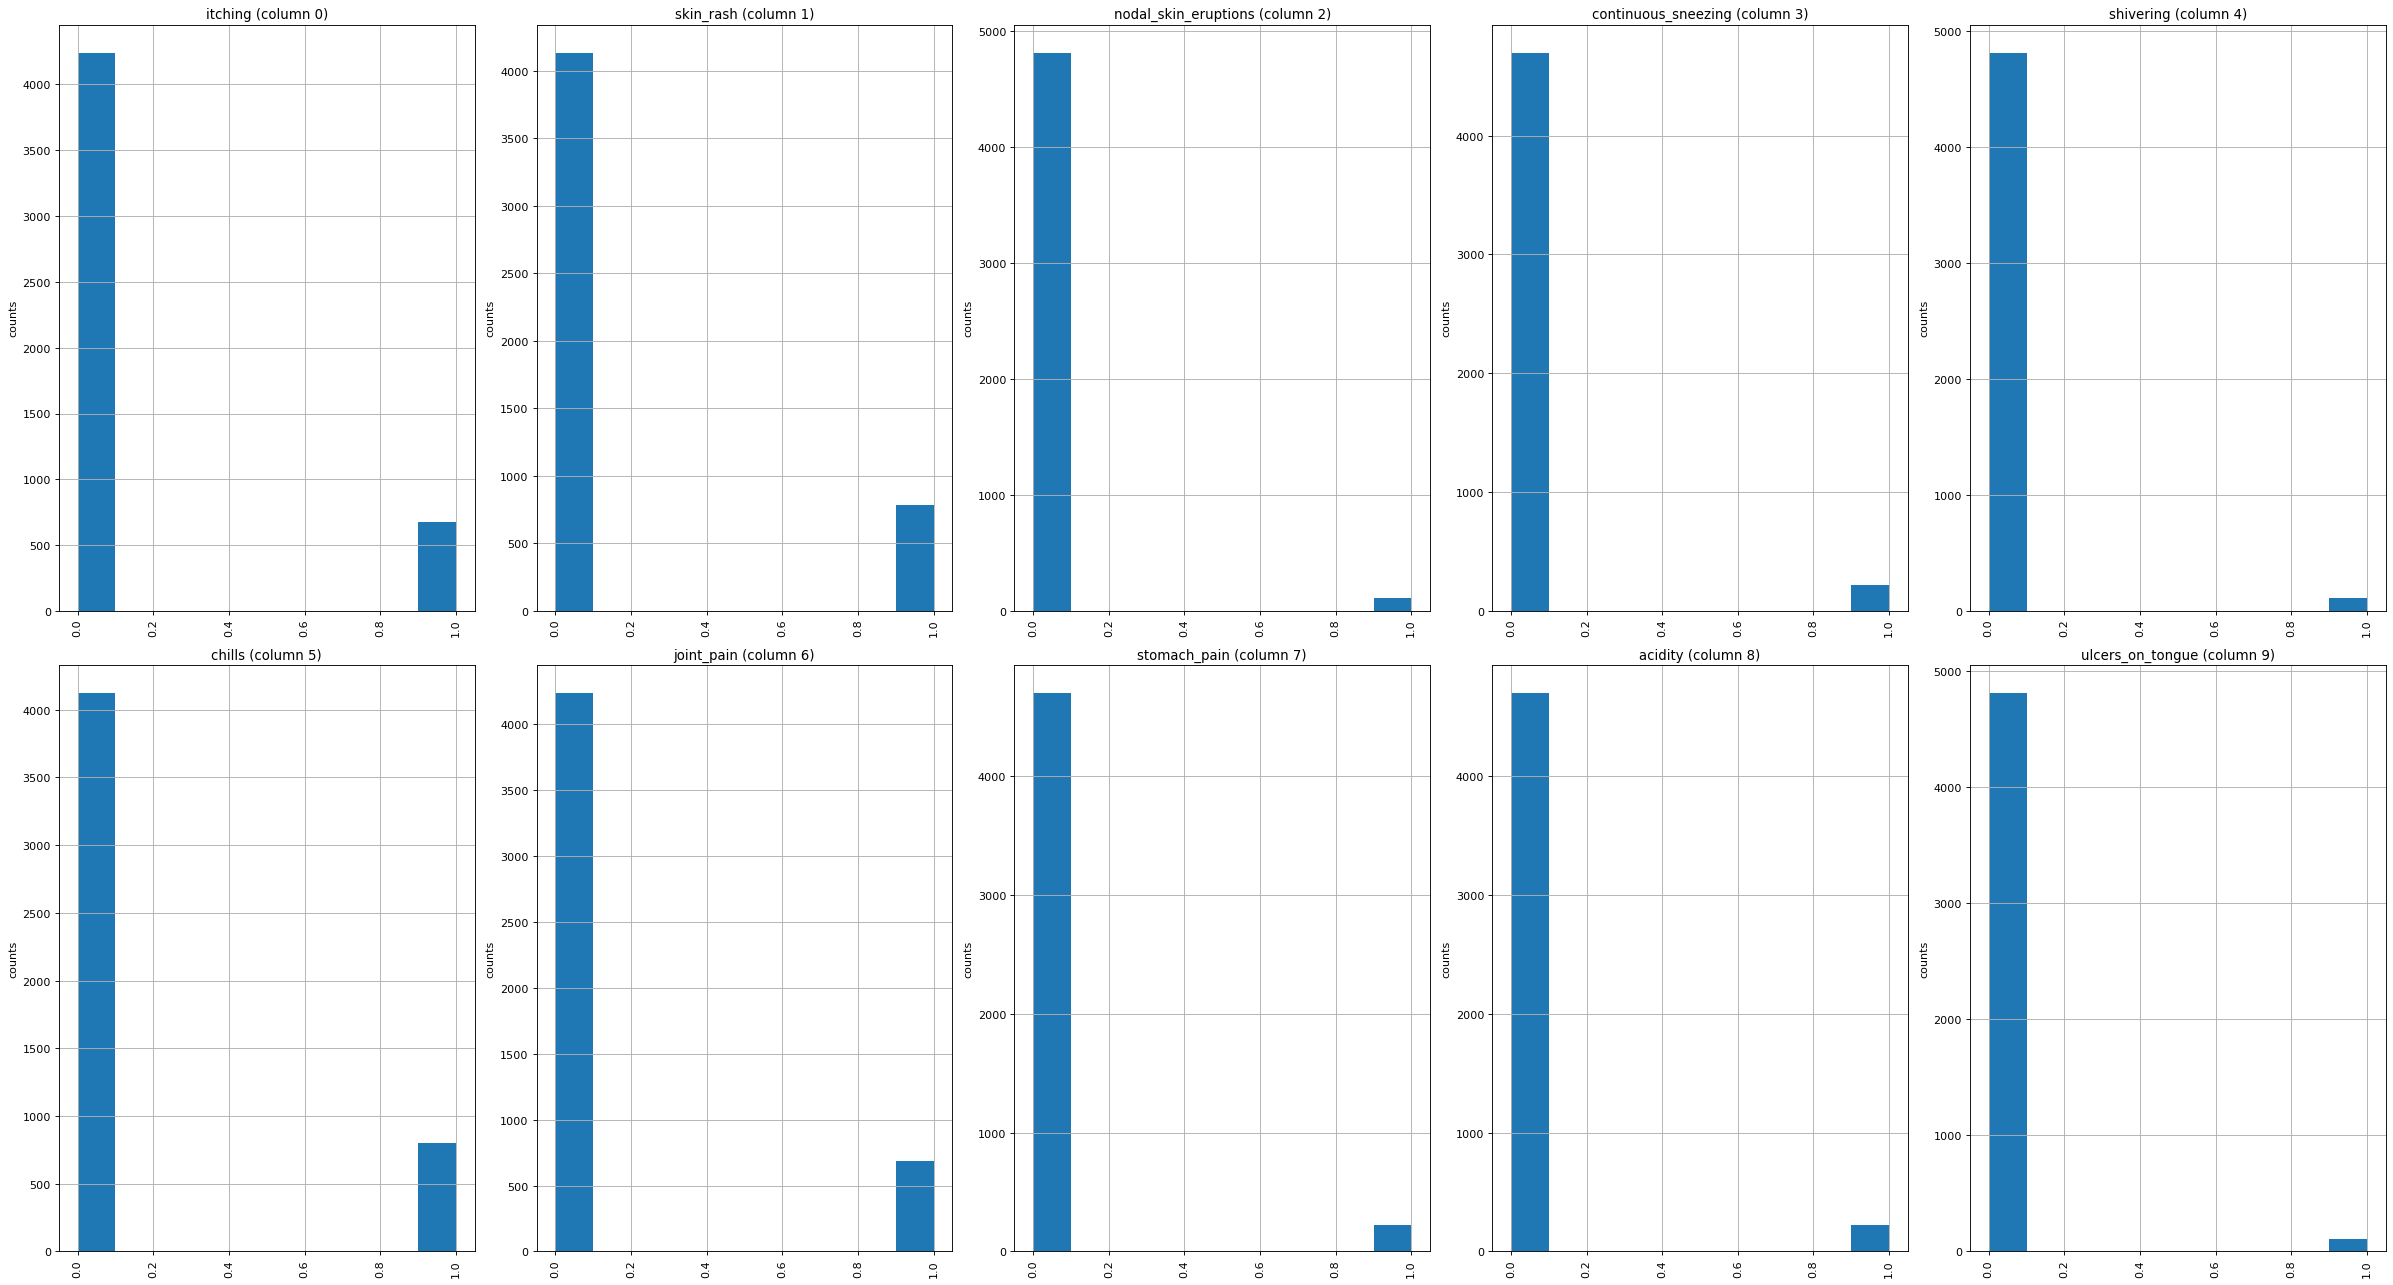

In [9]:
plotPerColumnDistribution(df, 10, 5)

C:\Users\simey\AppData\Local\Temp\ipykernel_6532\144780781.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1 = df1.dropna('columns')


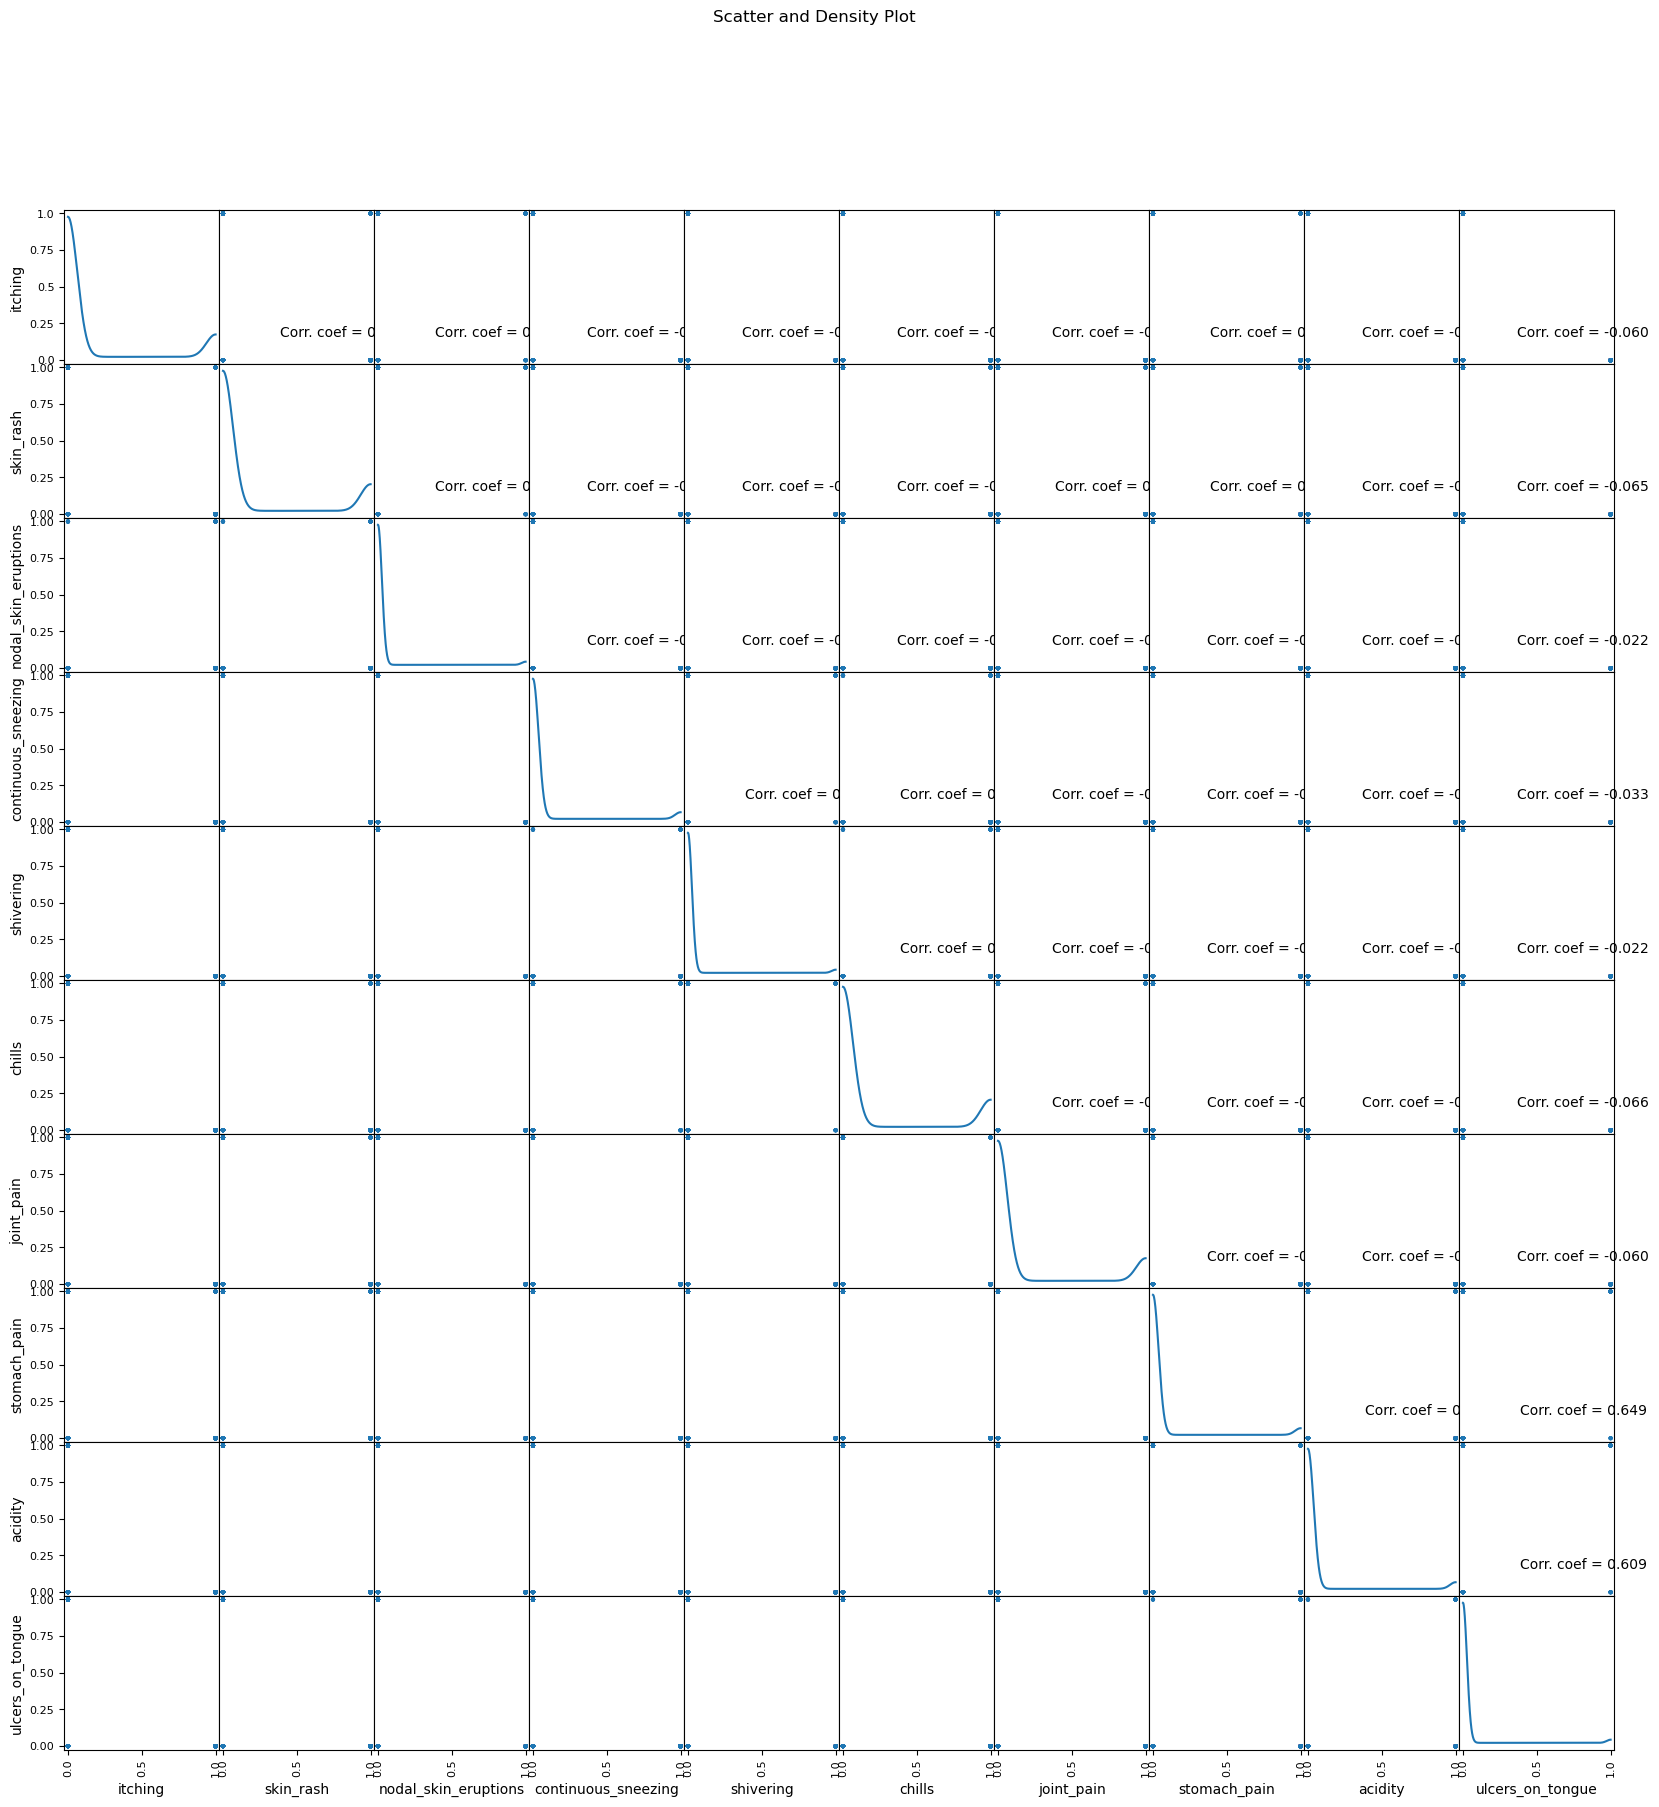

In [10]:
plotScatterMatrix(df, 20, 10)

In [11]:
X = df[l1]
y = df[["prognosis"]]
np.ravel(y)
print(X)

      back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0             0             0               0          0           0   
1             0             0               0          0           0   
2             0             0               0          0           0   
3             0             0               0          0           0   
4             0             0               0          0           0   
...         ...           ...             ...        ...         ...   
4915          0             0               0          0           0   
4916          0             0               0          0           0   
4917          0             0               0          0           0   
4918          0             0               0          0           0   
4919          0             0               0          0           0   

      yellow_urine  yellowing_of_eyes  acute_liver_failure  fluid_overload  \
0                0                  0                    

In [12]:
print(y)

      prognosis
0             0
1             0
2             0
3             0
4             0
...         ...
4915         36
4916         37
4917         38
4918         39
4919         40

[4920 rows x 1 columns]


In [13]:
# Reading the testing.csv file
tr = pd.read_csv("testing.csv")

# Using inbuilt function replace in pandas for replacing the values in the "prognosis" column
tr.replace({'prognosis':{'Fungal infection':0,'Allergy':1,'GERD':2,'Chronic cholestasis':3,'Drug Reaction':4,
    'Peptic ulcer diseae':5,'AIDS':6,'Diabetes ':7,'Gastroenteritis':8,'Bronchial Asthma':9,'Hypertension ':10,
    'Migraine':11,'Cervical spondylosis':12,
    'Paralysis (brain hemorrhage)':13,'Jaundice':14,'Malaria':15,'Chicken pox':16,'Dengue':17,'Typhoid':18,'hepatitis A':19,
    'Hepatitis B':20,'Hepatitis C':21,'Hepatitis D':22,'Hepatitis E':23,'Alcoholic hepatitis':24,'Tuberculosis':25,
    'Common Cold':26,'Pneumonia':27,'Dimorphic hemmorhoids(piles)':28,'Heart attack':29,'Varicose veins':30,'Hypothyroidism':31,
    'Hyperthyroidism':32,'Hypoglycemia':33,'Osteoarthristis':34,'Arthritis':35,
    '(vertigo) Paroymsal  Positional Vertigo':36,'Acne':37,'Urinary tract infection':38,'Psoriasis':39,
    'Impetigo':40}}, inplace=True)

# Display the first few rows of the modified testing dataset
tr.head()


itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  shivering  \
0        1          1                     1                    0          0   
1        0          0                     0                    1          1   
2        0          0                     0                    0          0   
3        1          0                     0                    0          0   
4        1          1                     0                    0          0   

   chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  ...  \
0       0           0             0        0                 0  ...   
1       1           0             0        0                 0  ...   
2       0           0             1        1                 1  ...   
3       0           0             0        0                 0  ...   
4       0           0             1        0                 0  ...   

   blackheads  scurring  skin_peeling  silver_like_dusting  \
0           0         0             0                    0   
1           0         0             0                    0   
2           0         0             0                    0   
3           0         0             0                    0   
4           0         0             0                    0   

   small_dents_in_nails  inflammatory_nails  blister  red_sore_around_nose  \
0                     0                   0        0                     0   
1                     0                   0        0                     0   
2                     0                   0        0                     0   
3                     0                   0        0                     0   
4                     0                   0        0                     0   

   yellow_crust_ooze  prognosis  
0                  0          0  
1                  0          1  
2                  0          2  
3                  0          3  
4                  0          4  

[5 rows x 133 columns]

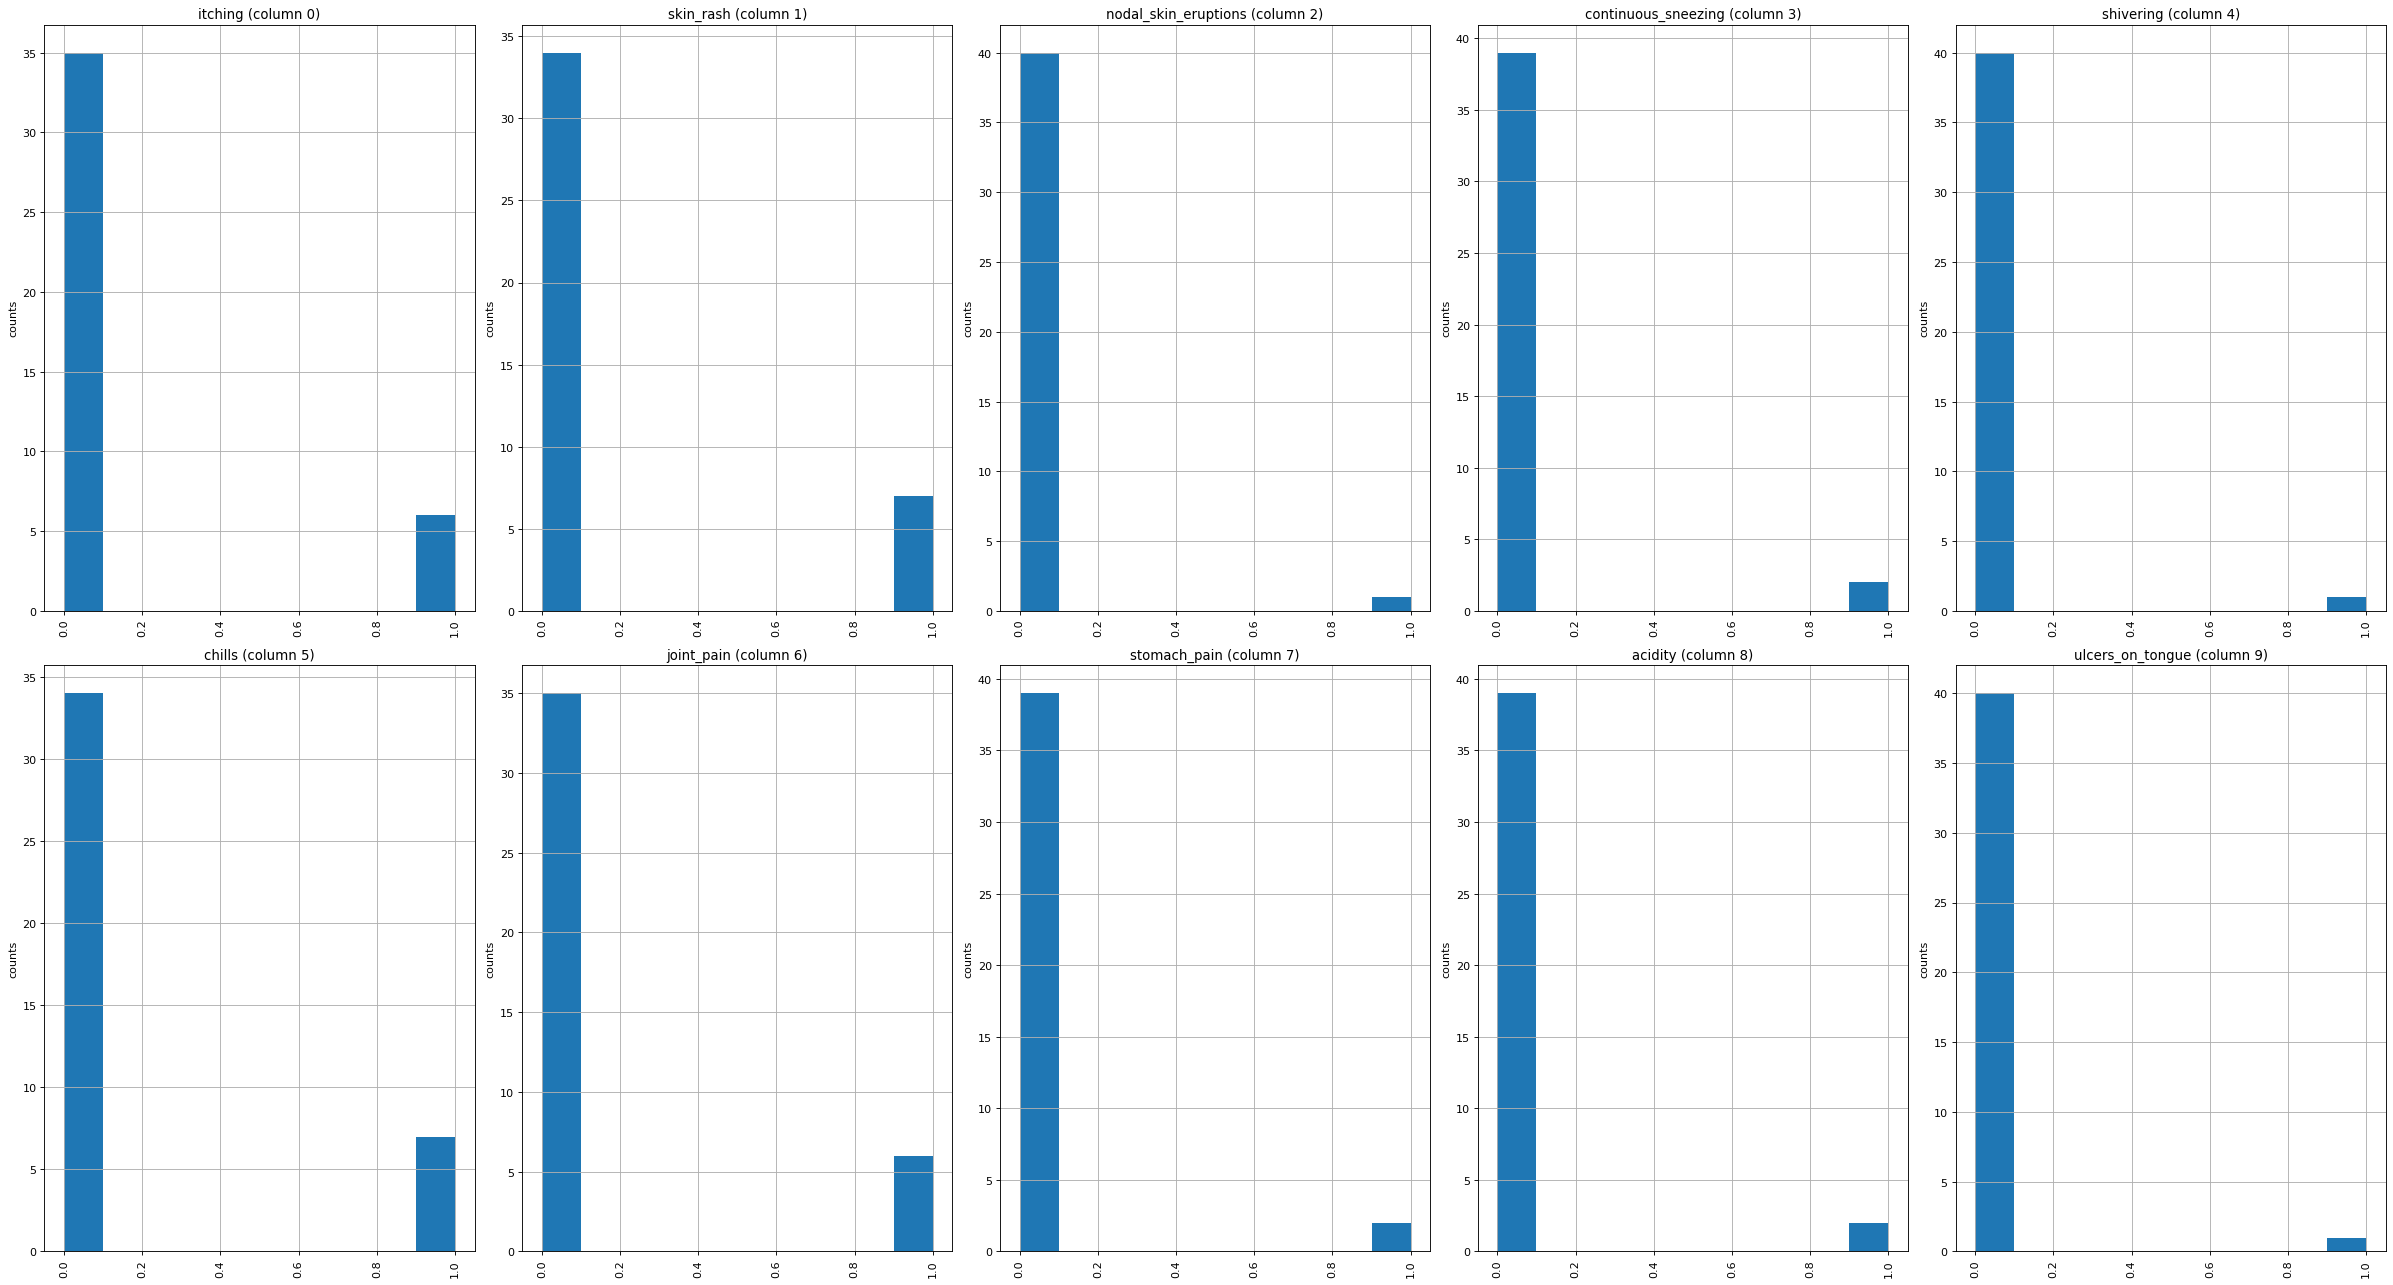

In [14]:
plotPerColumnDistribution(tr, 10, 5)

C:\Users\simey\AppData\Local\Temp\ipykernel_6532\144780781.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df1 = df1.dropna('columns')


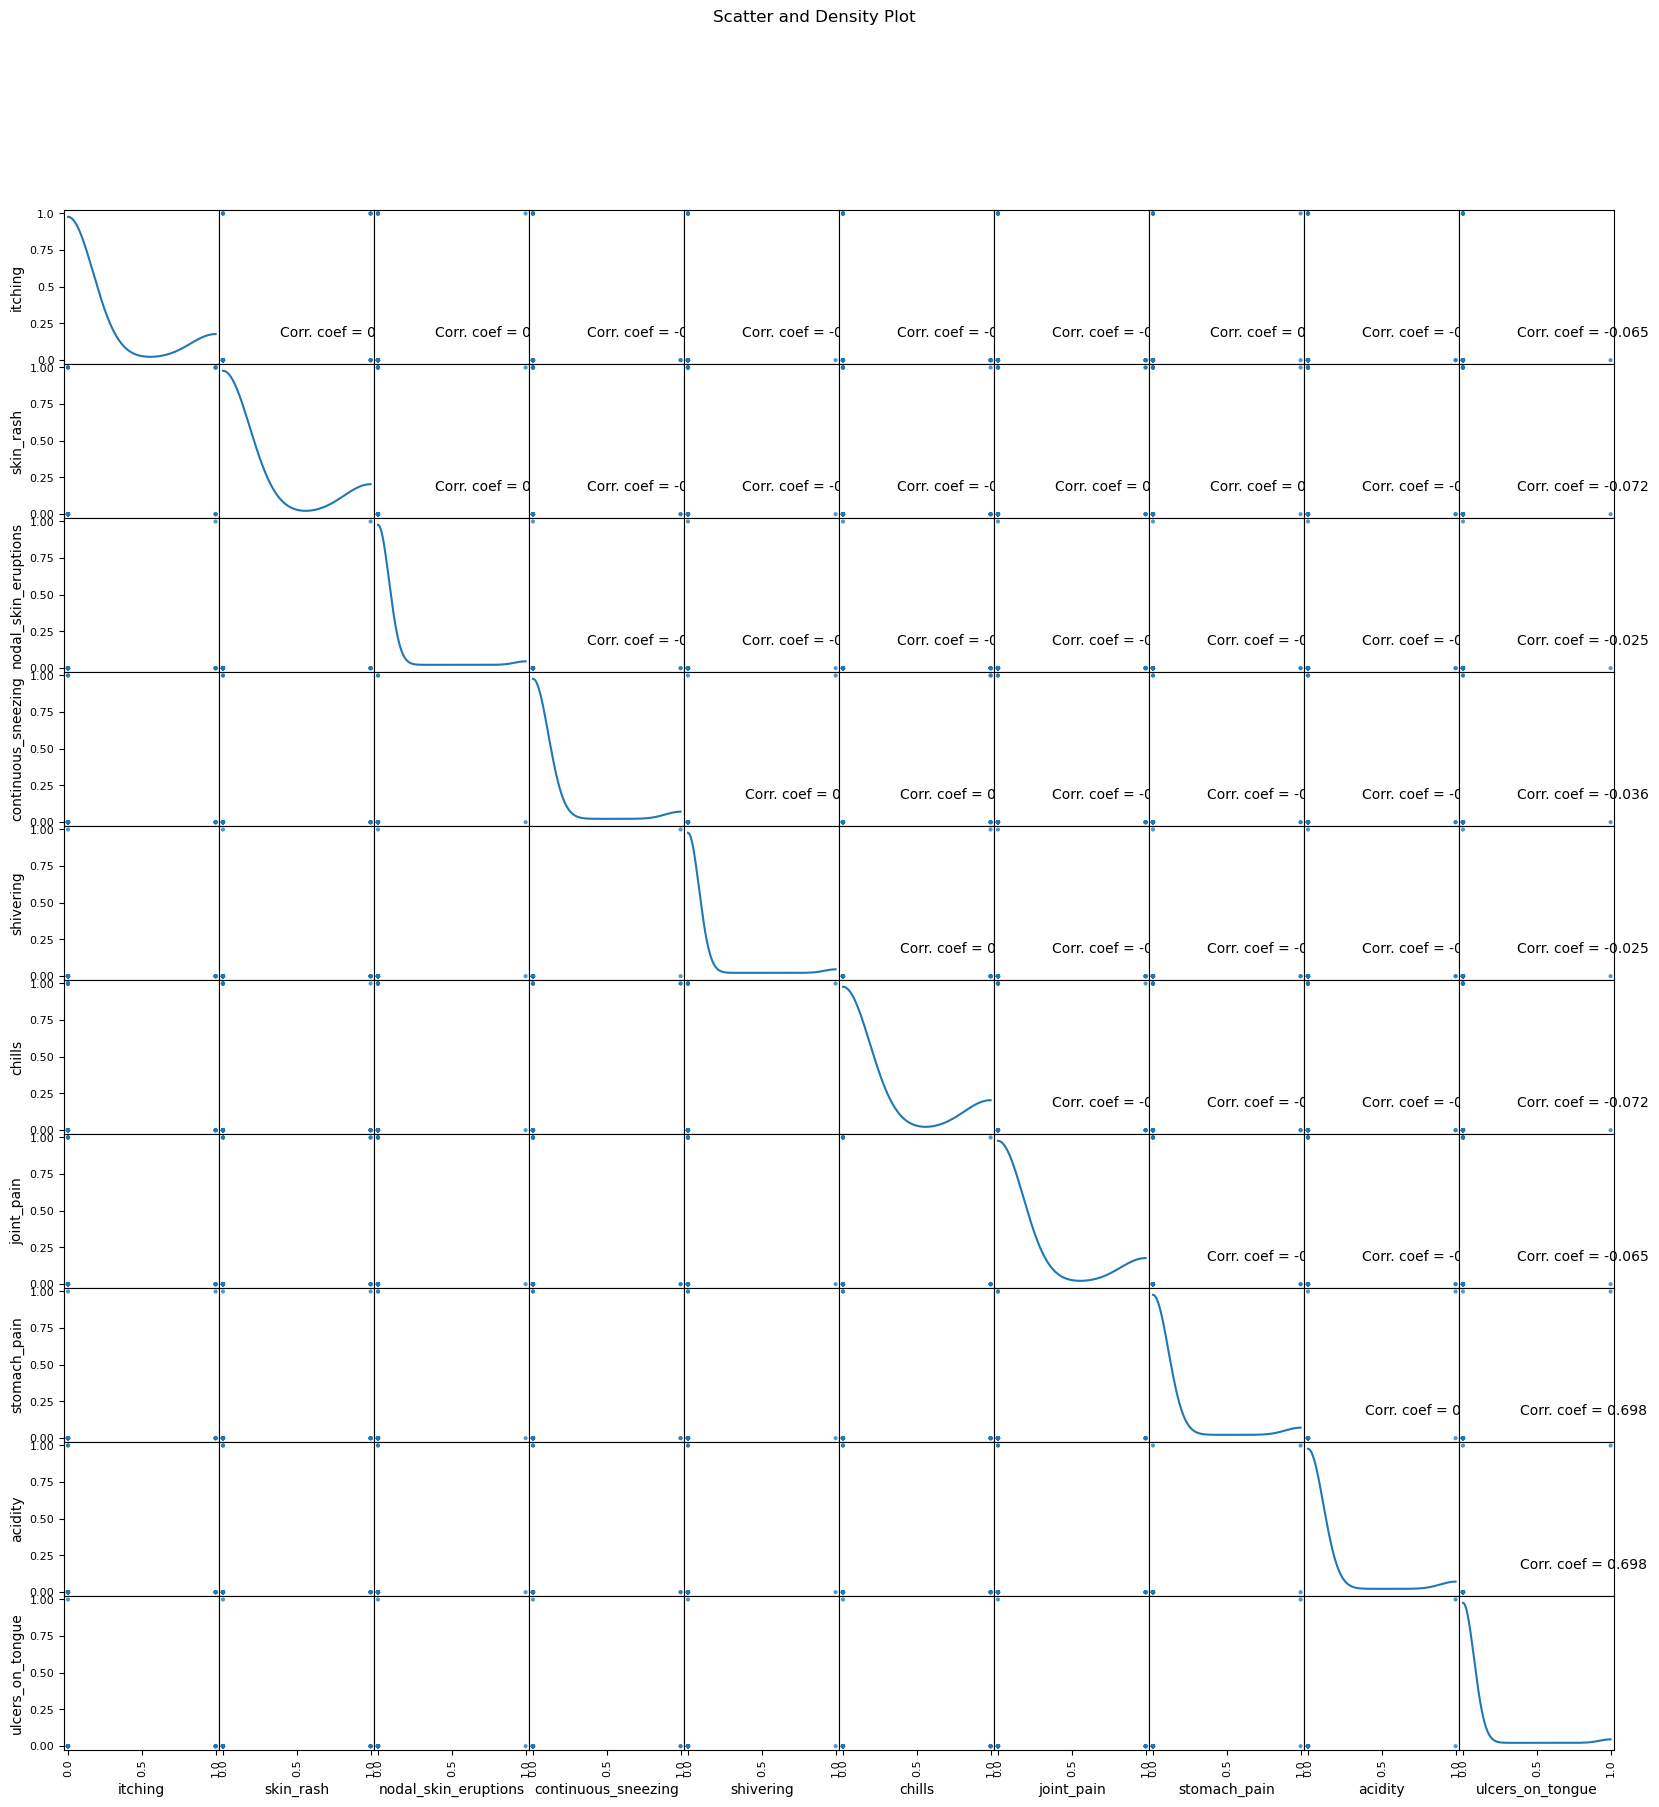

In [15]:
plotScatterMatrix(tr, 20, 10)

In [16]:
X_test = tr[l1]
y_test = tr[["prognosis"]]
np.ravel(y_test)
print("Features (X_test):\n", X_test)
print("\nTarget (y_test):\n", y_test)


Features (X_test):
     back_pain  constipation  abdominal_pain  diarrhoea  mild_fever  \
0           0             0               0          0           0   
1           0             0               0          0           0   
2           0             0               0          0           0   
3           0             0               1          0           0   
4           0             0               0          0           0   
5           0             0               1          0           0   
6           0             0               0          0           0   
7           0             0               0          0           0   
8           0             0               0          1           0   
9           0             0               0          0           0   
10          0             0               0          0           0   
11          0             0               0          0           0   
12          1             0               0          0           0   


## To build a precise model, I have used 3 different algorithms:

##    -> Decision Tree Algorithm(95.12%)
##    -> Random Forest Algorithm(95.12%)
##    -> Naive Bayes Algorithm(95.2%)

In [17]:
# list1 = DF['prognosis'].unique()
# This function generates and displays a scatter plot for a given disease
def scatterplt(disea):
    # Count the occurrences of symptoms for the specified disease
    x = ((DF.loc[disea]).sum())
    # Drop symptoms with zero occurrences
    x.drop(x[x == 0].index, inplace=True)
    print(x.values)  # Print the symptom counts for debugging purposes
    y = x.keys()  # Extract symptom names
    print(len(x))  # Print the length of symptom counts for debugging purposes
    print(len(y))  # Print the length of symptom names for debugging purposes
    plt.title(disea)
    # Create a scatter plot with symptom names on the x-axis and their counts on the y-axis
    plt.scatter(y, x.values)
    plt.show()

# This function generates and displays a scatter plot based on selected symptoms
def scattering(sym1, sym2, sym3, sym4, sym5):
    x = [sym1, sym2, sym3, sym4, sym5]
    y = [0, 0, 0, 0, 0]
    # Check if each symptom is selected; if selected, set the corresponding flag to 1
    if sym1 != 'Select Here':
        y[0] = 1
    if sym2 != 'Select Here':
        y[1] = 1
    if sym3 != 'Select Here':
        y[2] = 1
    if sym4 != 'Select Here':
        y[3] = 1
    if sym5 != 'Select Here':
        y[4] = 1
    print(x)  # Print the selected symptoms for debugging purposes
    print(y)  # Print the flags for selected symptoms for debugging purposes
    scatterplt(x, y)  # Call the scatterplt function with selected symptoms and flags
    plt.show()


# Decisiom Tree Algorithm

In [18]:
root = Tk()
pred1 = StringVar()

# Function to perform decision tree classification
def decisiontree():
    # Check if the Name field is filled
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly fill your Name")
        if comp:
            root.mainloop()
    # Check if at least two symptoms are selected
    elif (Symptom1.get() == "Select Here") or (Symptom2.get() == "Select Here"):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly fill at least first two symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn import tree
        
        # Initialize and train the decision tree classifier
        clf3 = tree.DecisionTreeClassifier()
        clf3 = clf3.fit(X, y)
        
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        # Make predictions on the test set
        y_pred = clf3.predict(X_test)
        
        # Print accuracy metrics
        print("Decision Tree")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion Matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
        
        # Extract symptoms from the GUI
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]
        
        # Update the binary list based on selected symptoms
        for k in range(0, len(l1)):
            for z in psymptoms:
                if z == l1[k]:
                    l2[k] = 1
        
        inputtest = [l2]
        predict = clf3.predict(inputtest)
        predicted = predict[0]
        
        h = 'no'
        # Find the disease based on the predicted index
        for a in range(0, len(disease)):
            if predicted == a:
                h = 'yes'
                break
        
        if h == 'yes':
            pred1.set(" ")
            pred1.set(disease[a])
        else:
            pred1.set(" ")
            pred1.set("Not Found")
        
        # Create a SQLite database and insert the prediction result
        import sqlite3
        conn = sqlite3.connect('database.db')
        c = conn.cursor()
        c.execute("CREATE TABLE IF NOT EXISTS DecisionTree(Name TEXT, Symptom1 TEXT, Symptom2 TEXT, Symptom3 TEXT, Symptom4 TEXT, Symptom5 TEXT, Disease TEXT)")
        c.execute("INSERT INTO DecisionTree(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
                  (NameEn.get(), Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get(), pred1.get()))
        conn.commit()
        c.close()
        conn.close()
        
        # Call the functions to generate scatter plots
        scatterplt(pred1.get())
        scattering(Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get())


# Random Forest Algorithm

In [19]:
pred2 = StringVar()

# Function to perform random forest classification
def randomforest():
    # Check if the Name field is filled
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    # Check if at least two symptoms are selected
    elif (Symptom1.get() == "Select Here") or (Symptom2.get() == "Select Here"):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.ensemble import RandomForestClassifier
        
        # Initialize and train the random forest classifier
        clf4 = RandomForestClassifier(n_estimators=100)
        clf4 = clf4.fit(X, np.ravel(y))

        # Calculate accuracy
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = clf4.predict(X_test)
        print("Random Forest")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)
    
        # Extract symptoms from the GUI
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]

        # Update the binary list based on selected symptoms
        for k in range(0, len(l1)):
            for z in psymptoms:
                if z == l1[k]:
                    l2[k] = 1

        inputtest = [l2]
        predict = clf4.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        # Find the disease based on the predicted index
        for a in range(0, len(disease)):
            if predicted == a:
                h = 'yes'
                break
        if h == 'yes':
            pred2.set(" ")
            pred2.set(disease[a])
        else:
            pred2.set(" ")
            pred2.set("Not Found")
        
        # Create a SQLite database and insert the prediction result
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS RandomForest(Name TEXT, Symptom1 TEXT, Symptom2 TEXT, Symptom3 TEXT, Symptom4 TEXT, Symptom5 TEXT, Disease TEXT)")
        c.execute("INSERT INTO RandomForest(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
                  (NameEn.get(), Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get(), pred2.get()))
        conn.commit()  
        c.close() 
        conn.close()
        
        # Print scatter plot of disease predicted vs its symptoms
        scatterplt(pred2.get())


# Naive Bayes Algorithm

In [20]:
pred3 = StringVar()

# Function to perform Naive Bayes classification
def NaiveBayes():
    # Check if the Name field is filled
    if len(NameEn.get()) == 0:
        pred1.set(" ")
        comp = messagebox.askokcancel("System", "Kindly Fill the Name")
        if comp:
            root.mainloop()
    # Check if at least two symptoms are selected
    elif (Symptom1.get() == "Select Here") or (Symptom2.get() == "Select Here"):
        pred1.set(" ")
        sym = messagebox.askokcancel("System", "Kindly Fill at least first two Symptoms")
        if sym:
            root.mainloop()
    else:
        from sklearn.naive_bayes import GaussianNB
        
        # Initialize and train the Naive Bayes classifier
        gnb = GaussianNB()
        gnb = gnb.fit(X, np.ravel(y))

        # Calculate accuracy
        from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
        y_pred = gnb.predict(X_test)
        print("Naive Bayes")
        print("Accuracy")
        print(accuracy_score(y_test, y_pred))
        print(accuracy_score(y_test, y_pred, normalize=False))
        print("Confusion matrix")
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(conf_matrix)

        # Extract symptoms from the GUI
        psymptoms = [Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get()]
        
        # Update the binary list based on selected symptoms
        for k in range(0, len(l1)):
            for z in psymptoms:
                if z == l1[k]:
                    l2[k] = 1

        inputtest = [l2]
        predict = gnb.predict(inputtest)
        predicted = predict[0]

        h = 'no'
        # Find the disease based on the predicted index
        for a in range(0, len(disease)):
            if predicted == a:
                h = 'yes'
                break
        if h == 'yes':
            pred3.set(" ")
            pred3.set(disease[a])
        else:
            pred3.set(" ")
            pred3.set("Not Found")

        # Create a SQLite database and insert the prediction result
        import sqlite3 
        conn = sqlite3.connect('database.db') 
        c = conn.cursor() 
        c.execute("CREATE TABLE IF NOT EXISTS NaiveBayes(Name TEXT, Symptom1 TEXT, Symptom2 TEXT, Symptom3 TEXT, Symptom4 TEXT, Symptom5 TEXT, Disease TEXT)")
        c.execute("INSERT INTO NaiveBayes(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
                  (NameEn.get(), Symptom1.get(), Symptom2.get(), Symptom3.get(), Symptom4.get(), Symptom5.get(), pred3.get()))
        conn.commit()  
        c.close() 
        conn.close()
        
        # Print scatter plot of disease predicted vs its symptoms
        scatterplt(pred3.get())


# Building GUI

In [21]:
# Set the background color of the Tkinter window to Ivory
root.configure(background='Ivory')

# Set the title of the Tkinter window to 'Smart Disease Prediction System'
root.title('Smart Disease Prediction System')

# Make the Tkinter window non-resizable (0, 0 means both horizontally and vertically)
root.resizable(0, 0)


''

In [22]:
# Define and initialize StringVar variables for symptom selection and name
Symptom1 = StringVar()
Symptom1.set("Select Here")

Symptom2 = StringVar()
Symptom2.set("Select Here")

Symptom3 = StringVar()
Symptom3.set("Select Here")

Symptom4 = StringVar()
Symptom4.set("Select Here")

Symptom5 = StringVar()
Symptom5.set("Select Here")

Name = StringVar()


In [23]:
prev_win = None

def Reset():
    global prev_win
    
    # Reset symptom selection and name entry
    Symptom1.set("Select Here")
    Symptom2.set("Select Here")
    Symptom3.set("Select Here")
    Symptom4.set("Select Here")
    Symptom5.set("Select Here")
    NameEn.delete(first=0, last=100)
    
    # Reset prediction StringVars
    pred1.set(" ")
    pred2.set(" ")
    pred3.set(" ")
    
    try:
        # Destroy the previous window if it exists
        prev_win.destroy()
        prev_win = None
    except AttributeError:
        pass


In [24]:
# Importing the messagebox module from the tkinter library
from tkinter import messagebox

def Exit():
    # Display a messagebox with a yes/no option to confirm exiting the system
    qExit = messagebox.askyesno("System", "Do you want to exit the system")
    
    # If the user clicks "Yes," destroy the main window and exit the program
    if qExit:
        root.destroy()
        exit()


In [25]:
# Creating a label widget for the heading of the GUI
w2 = Label(root, justify=LEFT, text="Disease Predictor using Machine Learning", fg="Red", bg="Ivory")

# Configuring the font of the label
w2.config(font=("Times", 30, "bold italic"))

# Placing the label on the grid layout
w2.grid(row=1, column=0, columnspan=2, padx=100)


In [26]:
# Creating a label widget for the name
NameLb = Label(root, text="Name of the Patient *", fg="Red", bg="Ivory")

# Configuring the font of the label
NameLb.config(font=("Times", 15, "bold italic"))

# Placing the label on the grid layout
NameLb.grid(row=6, column=0, padx=15, pady=15, sticky=W)


In [27]:
# Creating labels for symptoms
S1Lb = Label(root, text="Symptom 1 *", fg="Black", bg="Ivory")
S1Lb.config(font=("Times", 15, "bold italic"))
S1Lb.grid(row=7, column=0, padx=15, pady=10, sticky=W)

S2Lb = Label(root, text="Symptom 2 *", fg="Black", bg="Ivory")
S2Lb.config(font=("Times", 15, "bold italic"))
S2Lb.grid(row=8, column=0, padx=15, pady=10, sticky=W)

S3Lb = Label(root, text="Symptom 3", fg="Black", bg="Ivory")
S3Lb.config(font=("Times", 15, "bold italic"))
S3Lb.grid(row=9, column=0, padx=15, pady=10, sticky=W)

S4Lb = Label(root, text="Symptom 4", fg="Black", bg="Ivory")
S4Lb.config(font=("Times", 15, "bold italic"))
S4Lb.grid(row=10, column=0, padx=15, pady=10, sticky=W)

S5Lb = Label(root, text="Symptom 5", fg="Black", bg="Ivory")
S5Lb.config(font=("Times", 15, "bold italic"))
S5Lb.grid(row=11, column=0, padx=15, pady=10, sticky=W)


In [28]:
# Labels for Algorithms
lrLb = Label(root, text="DecisionTree", fg="Black", bg="Sky Blue", width=20)
lrLb.config(font=("Times", 15, "bold italic"))
lrLb.grid(row=16, column=0, padx=15, pady=10, sticky=W)

destreeLb = Label(root, text="RandomForest", fg="Black", bg="Sky Blue", width=20)
destreeLb.config(font=("Times", 15, "bold italic"))
destreeLb.grid(row=17, column=0, padx=15, pady=10, sticky=W)

ranfLb = Label(root, text="NaiveBayes", fg="Black", bg="Sky Blue", width=20)
ranfLb.config(font=("Times", 15, "bold italic"))
ranfLb.grid(row=18, column=0, padx=15, pady=10, sticky=W)

OPTIONS = sorted(l1)


In [29]:
# Taking name as input from the user
NameEn = Entry(root, textvariable=Name)
NameEn.grid(row=6, column=1)

# Taking symptoms as input from the user using dropdown menu
S1 = OptionMenu(root, Symptom1, *OPTIONS)
S1.grid(row=7, column=1)

S2 = OptionMenu(root, Symptom2, *OPTIONS)
S2.grid(row=8, column=1)

S3 = OptionMenu(root, Symptom3, *OPTIONS)
S3.grid(row=9, column=1)

S4 = OptionMenu(root, Symptom4, *OPTIONS)
S4.grid(row=10, column=1)

S5 = OptionMenu(root, Symptom5, *OPTIONS)
S5.grid(row=11, column=1)


In [30]:
# Buttons for predicting the disease using different algorithms
dst = Button(root, text="Prediction 1", command=decisiontree, fg="Black", bg="Sky Blue")
dst.config(font=("Times", 15, "bold italic"))
dst.grid(row=6, column=3, padx=10)

rnf = Button(root, text="Prediction 2", command=randomforest, fg="Black", bg="Sky Blue")
rnf.config(font=("Times", 15, "bold italic"))
rnf.grid(row=7, column=3, padx=10)

lr = Button(root, text="Prediction 3", command=NaiveBayes, fg="Black", bg="Sky Blue")
lr.config(font=("Times", 15, "bold italic"))
lr.grid(row=8, column=3, padx=10)

rs = Button(root, text="Reset Inputs", command=Reset, bg="Red", fg="White", width=15)
rs.config(font=("Times", 15, "bold italic"))
rs.grid(row=18, column=3, padx=10, pady=10)

ex = Button(root, text="Exit System", command=Exit, bg="Red", fg="White", width=15)
ex.config(font=("Times", 15, "bold italic"))
ex.grid(row=19, column=3, padx=10, pady=10)


In [31]:
# Showing the output of different Algorithms
t1 = Label(root, font=("Times", 15, "bold italic"), text="Decision Tree", height=1, bg="Light green",
           width=40, fg="Black", textvariable=pred1, relief="sunken").grid(row=16, column=1, padx=10)

t2 = Label(root, font=("Times", 15, "bold italic"), text="Random Forest", height=1, bg="Light green",
           width=40, fg="Black", textvariable=pred2, relief="sunken").grid(row=17, column=1, padx=10)

t3 = Label(root, font=("Times", 15, "bold italic"), text="Naive Bayes", height=1, bg="Light green",
           width=40, fg="Black", textvariable=pred3, relief="sunken").grid(row=18, column=1, padx=10)


In [ ]:
root.mainloop()

Decision Tree
Accuracy
0.9512195121951219
39
Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\3431759102.py", line 70, in decisiontree
    c.execute("INSERT INTO DecisionTree(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table DecisionTree has no column named Symptom1


Random Forest
Accuracy
0.9512195121951219
39
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\3690723483.py", line 66, in randomforest
    c.execute("INSERT INTO RandomForest(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table RandomForest has no column named Symptom1


Random Forest
Accuracy
0.9512195121951219
39
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\3690723483.py", line 66, in randomforest
    c.execute("INSERT INTO RandomForest(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table RandomForest has no column named Symptom1


Naive Bayes
Accuracy
0.9512195121951219
39
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\96122907.py", line 66, in NaiveBayes
    c.execute("INSERT INTO NaiveBayes(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table NaiveBayes has no column named Symptom1


Decision Tree
Accuracy
0.9512195121951219
39
Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\3431759102.py", line 70, in decisiontree
    c.execute("INSERT INTO DecisionTree(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table DecisionTree has no column named Symptom1


Random Forest
Accuracy
0.9512195121951219
39
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\3690723483.py", line 66, in randomforest
    c.execute("INSERT INTO RandomForest(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table RandomForest has no column named Symptom1


Naive Bayes
Accuracy
0.9512195121951219
39
Confusion matrix
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


C:\DEVELOPMENT\Anaconda\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\DEVELOPMENT\Anaconda\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\simey\AppData\Local\Temp\ipykernel_6532\96122907.py", line 66, in NaiveBayes
    c.execute("INSERT INTO NaiveBayes(Name, Symptom1, Symptom2, Symptom3, Symptom4, Symptom5, Disease) VALUES(?,?,?,?,?,?,?)",
sqlite3.OperationalError: table NaiveBayes has no column named Symptom1
